# Visualize Predictions

## Parameters

In [1]:
config = '/home/Nele/code/ct_classifier_zoops/configs/model_try.yaml'
split = 'test'

## Load Data

In [2]:
import yaml
from train import create_dataloader, load_model       # NOTE: since we're using these functions across files, it could make sense to put them in e.g. a "util.py" script.

# load config
print(f'Using config "{config}"')
cfg = yaml.safe_load(open(config, 'r'))


# setup entities
dl_test = create_dataloader(cfg, split='test')

# load model
model = load_model(cfg)

Using config "/home/Nele/code/ct_classifier_zoops/configs/model_try.yaml"
Loading annotations from /mnt/class_data/Nele/training.json...
os.path.exists(self.annoPath)=True
stat=['Station12_classified', 'Station14_classified', 'Station15_classified', 'Station16_classified', 'Station17_classified', 'Station19_classified', 'Station1_classified', 'Station22_classified', 'Station23_classified', 'Station25_classified', 'Station6_classified', 'Station9_classified']
images[:5]=['Station12_classified/amphi__Basler_avA2300-25gm__23232601__20210815_135851984_6671.tiff.tif_209_168_142_154.tif', 'Station15_classified/amphi__Basler_avA2300-25gm__23232601__20210816_124916572_5363.tiff.tif_1995_1214_111_191.tif', 'Station16_classified/amphi__Basler_avA2300-25gm__23232601__20210816_192333181_8521.tiff.tif_2038_682_110_219.tif', 'Station23_classified/amphi__Basler_avA2300-25gm__23232601__20210819_074808307_4091.tiff.tif_1030_1193_138_106.tif', 'Station15_classified/amphi__Basler_avA2300-25gm__23232601__

/home/Nele/miniconda3/envs/cv4ecology/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/Nele/miniconda3/envs/cv4ecology/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Visualize

Found checkpoint files: ['1.pt', '2.pt', '3.pt', '4.pt', '5.pt', '6.pt', '7.pt', '8.pt', '9.pt', '10.pt', '11.pt', '12.pt', '13.pt', '14.pt', '15.pt', '16.pt', '17.pt', '18.pt', '19.pt', '20.pt', '21.pt', '22.pt', '23.pt', '24.pt', '25.pt', '26.pt', '27.pt', '28.pt', '29.pt', '30.pt', '31.pt', '32.pt', '33.pt', '34.pt', '35.pt', '36.pt', '37.pt', '38.pt', '39.pt', '40.pt', '41.pt', '42.pt', '43.pt', '44.pt', '45.pt', '46.pt', '47.pt', '48.pt', '49.pt', '50.pt', '51.pt', '52.pt', '53.pt', '54.pt', '55.pt', '56.pt', '57.pt', '58.pt', '59.pt', '60.pt', '61.pt', '62.pt', '63.pt', '64.pt', '65.pt', '66.pt', '67.pt', '68.pt', '69.pt', '70.pt', '71.pt', '72.pt', '73.pt', '74.pt', '75.pt', '76.pt', '77.pt', '78.pt', '79.pt', '80.pt', '81.pt', '82.pt', '83.pt', '84.pt', '85.pt', '86.pt', '87.pt', '88.pt', '89.pt', '90.pt', '91.pt', '92.pt', '93.pt', '94.pt', '95.pt', '96.pt', '97.pt', '98.pt', '99.pt', '100.pt', '101.pt', '102.pt', '103.pt', '104.pt', '105.pt', '106.pt', '107.pt', '108.pt', '10

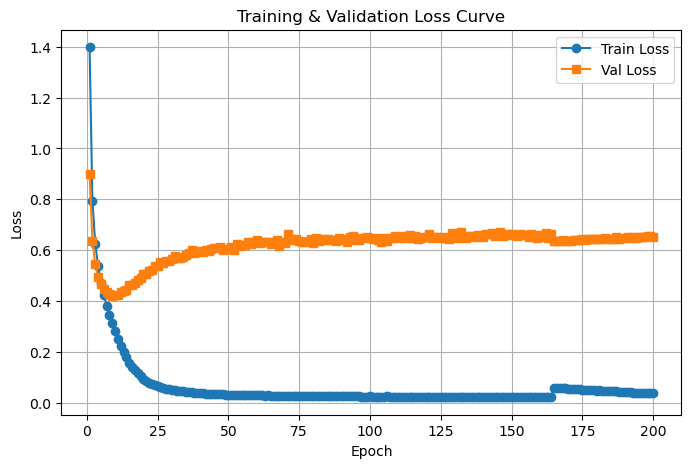

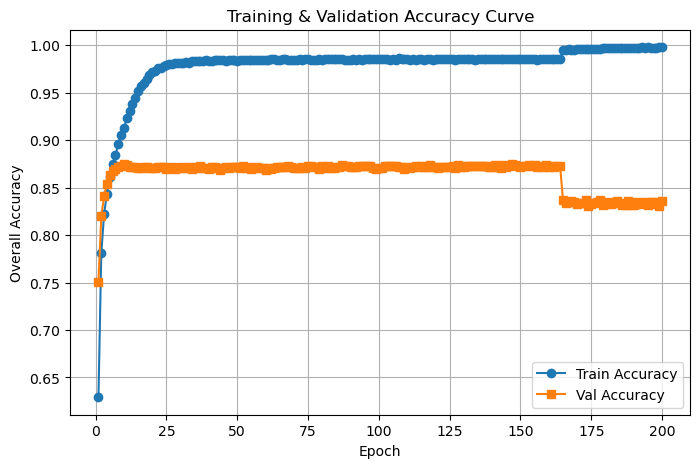

In [2]:
import os
import torch
import matplotlib.pyplot as plt

# --- 1. List checkpoint files ---
checkpoint_dir = "/home/Nele/code/ct_classifier_zoops/model_states"
#/home/Nele/code/ct_classifier_zoops/runs/Jan19_21-30-00_cv4e-2026-student4/val_predictions
ckpt_files = sorted([f for f in os.listdir(checkpoint_dir) if f.endswith(".pt")], key=lambda x: int(x.split('.')[0]))
print("Found checkpoint files:", ckpt_files)

# --- 2. Loop through checkpoints to collect metrics ---
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []
for f in ckpt_files:
    ckpt_path = os.path.join(checkpoint_dir, f)
    ckpt = torch.load(ckpt_path, map_location='cuda')  # or device if GPU available
    #load dataloader
    train_loss_list.append(ckpt['loss_train'])
    val_loss_list.append(ckpt['loss_val'])
    train_acc_list.append(ckpt['oa_train'])
    val_acc_list.append(ckpt['oa_val'])

# --- 3. Plot loss curve ---
epochs = range(1, len(train_loss_list)+1)
plt.figure(figsize=(8,5))
plt.plot(epochs, train_loss_list, 'o-', label='Train Loss')
plt.plot(epochs, val_loss_list, 's-', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.grid(True)
plt.show()
# --- 4. Plot accuracy curve ---
plt.figure(figsize=(8,5))
plt.plot(epochs, train_acc_list, 'o-', label='Train Accuracy')
plt.plot(epochs, val_acc_list, 's-', label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Overall Accuracy')
plt.title('Training & Validation Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()

